# National Health and Nutrition Examination Survey

### 2011 - 2012 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2011-2012
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/CBC_G.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_G.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count   8956.000000  7953.000000  7944.000000  7944.000000  7944.000000   
mean   67034.100603     6.995549    33.832880     7.701221    54.663394   
std     2811.937181     2.245365    10.771788     2.552985    11.960306   
min    62161.000000     1.700000     2.700000     0.600000     0.800000   
25%    64605.500000     5.500000    26.300000     6.100000    47.200000   
50%    67034.500000     6.700000    32.600000     7.500000    55.600000   
75%    69459.250000     8.100000    40.300000     8.900000    63.200000   
max    71916.000000    54.700000    83.200000    66.900000    96.600000   

           LBXEOPCT      LBXBAPCT     LBDLYMNO       LBDMONO      LBDNENO  \
count  7.944000e+03  7.944000e+03  7944.000000  7.944000e+03  7944.000000   
mean   3.118341e+00  7.257931e-01     2.314904  5.234013e-01     3.895859   
std    2.492585e+00  7.204207e-01     1.149226  2.323350e-01     1.700490   
min    5.397605e-79  5.397605e-79     0.200000  5.397605e-79     0.100000   
25%    1.500000e+00  4.000000e-01     1.700000  4.000000e-01     2.700000   
50%    2.500000e+00  6.000000e-01     2.100000  5.000000e-01     3.600000   
75%    3.800000e+00  9.000000e-01     2.700000  6.000000e-01     4.800000   
max    2.890000e+01  1.440000e+01    43.700000  1.020000e+01    18.500000   

       ...       LBDBANO     LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI  \
count  ...  7.944000e+03  7953.000000  7953.000000  7953.000000  7953.000000   
mean   ...  4.039527e-02     4.561022    13.589451    39.833975    87.554898   
std    ...  6.766474e-02     0.468825     1.483712     4.199270     6.472128   
min    ...  5.397605e-79     2.490000     6.100000    20.600000    50.500000   
25%    ...  5.397605e-79     4.260000    12.600000    37.000000    84.100000   
50%    ...  5.397605e-79     4.540000    13.600000    39.600000    88.100000   
75%    ...  1.000000e-01     4.860000    14.600000    42.800000    91.700000   
max    ...  1.400000e+00     7.050000    19.600000    57.700000   113.800000   

          LBXMCHSI        LBXMC       LBXRDW     LBXPLTSI      LBXMPSI  
count  7953.000000  7953.000000  7953.000000  7952.000000  7952.000000  
mean     29.873997    34.103345    12.946599   252.079225     8.245045  
std       2.524950     1.080440     1.284573    67.277761     0.938134  
min      14.900000    25.100000    10.800000    13.000000     5.600000  
25%      28.600000    33.400000    12.200000   206.000000     7.600000  
50%      30.100000    34.200000    12.700000   244.000000     8.100000  
75%      31.500000    34.800000    13.300000   289.000000     8.800000  
max      39.600000    38.500000    29.800000   681.000000    13.500000  

[8 rows x 21 columns]

<Axes: >

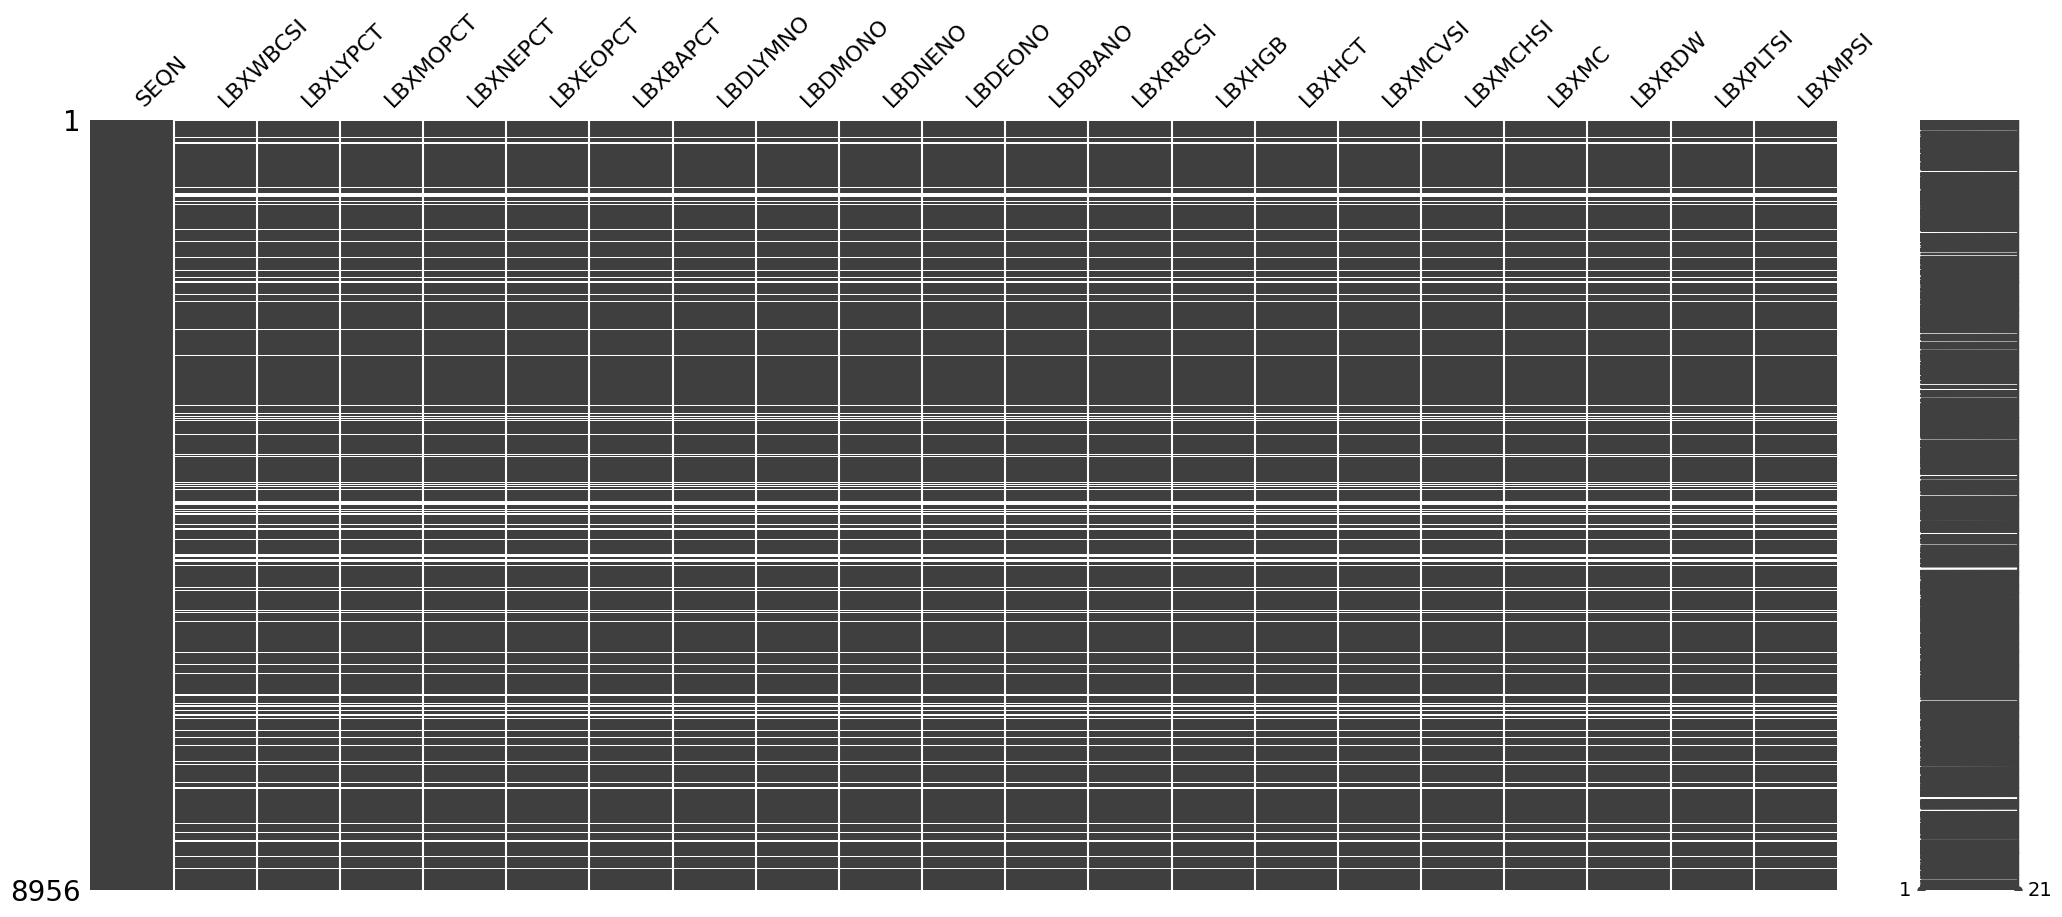

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
26    62189.0       8.2       NaN       NaN       NaN       NaN       NaN   
402   62599.0       4.3       NaN       NaN       NaN       NaN       NaN   
3193  65643.0       8.6       NaN       NaN       NaN       NaN       NaN   
4767  67345.0       8.9       NaN       NaN       NaN       NaN       NaN   
5064  67669.0       7.9       NaN       NaN       NaN       NaN       NaN   
5711  68372.0       5.1       NaN       NaN       NaN       NaN       NaN   
5837  68514.0       9.0       NaN       NaN       NaN       NaN       NaN   
7305  70094.0       7.7       NaN       NaN       NaN       NaN       NaN   
7773  70617.0      10.0       NaN       NaN       NaN       NaN       NaN   

      LBDLYMNO  LBDMONO  LBDNENO  ...  LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
26         NaN      NaN      NaN  ...      NaN      5.62     9.2    32.5   
402        NaN      NaN      NaN  ...      NaN      4.39     9.9    30.5   
3193       NaN      NaN      NaN  ...      NaN      3.86    11.6    33.5   
4767       NaN      NaN      NaN  ...      NaN      3.80    11.9    32.9   
5064       NaN      NaN      NaN  ...      NaN      4.95     7.4    25.3   
5711       NaN      NaN      NaN  ...      NaN      5.22    10.5    32.6   
5837       NaN      NaN      NaN  ...      NaN      5.43     8.6    27.5   
7305       NaN      NaN      NaN  ...      NaN      3.74    11.8    33.3   
7773       NaN      NaN      NaN  ...      NaN      3.32    11.8    33.0   

      LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
26        57.8      16.3   28.2    24.0       NaN      NaN  
402       69.5      22.5   32.5    18.3     436.0      9.1  
3193      86.7      30.0   34.6    13.7     174.0      9.6  
4767      86.4      31.2   36.1    12.0     486.0      7.0  
5064      51.0      14.9   29.1    20.7     295.0      7.0  
5711      62.4      20.2   32.3    17.2     319.0     10.0  
5837      50.7      15.7   31.1    23.5     476.0      9.0  
7305      89.3      31.4   35.2    12.4     126.0      9.1  
7773      99.5      35.5   35.6    12.2     272.0      8.7  

[9 rows x 21 columns]

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

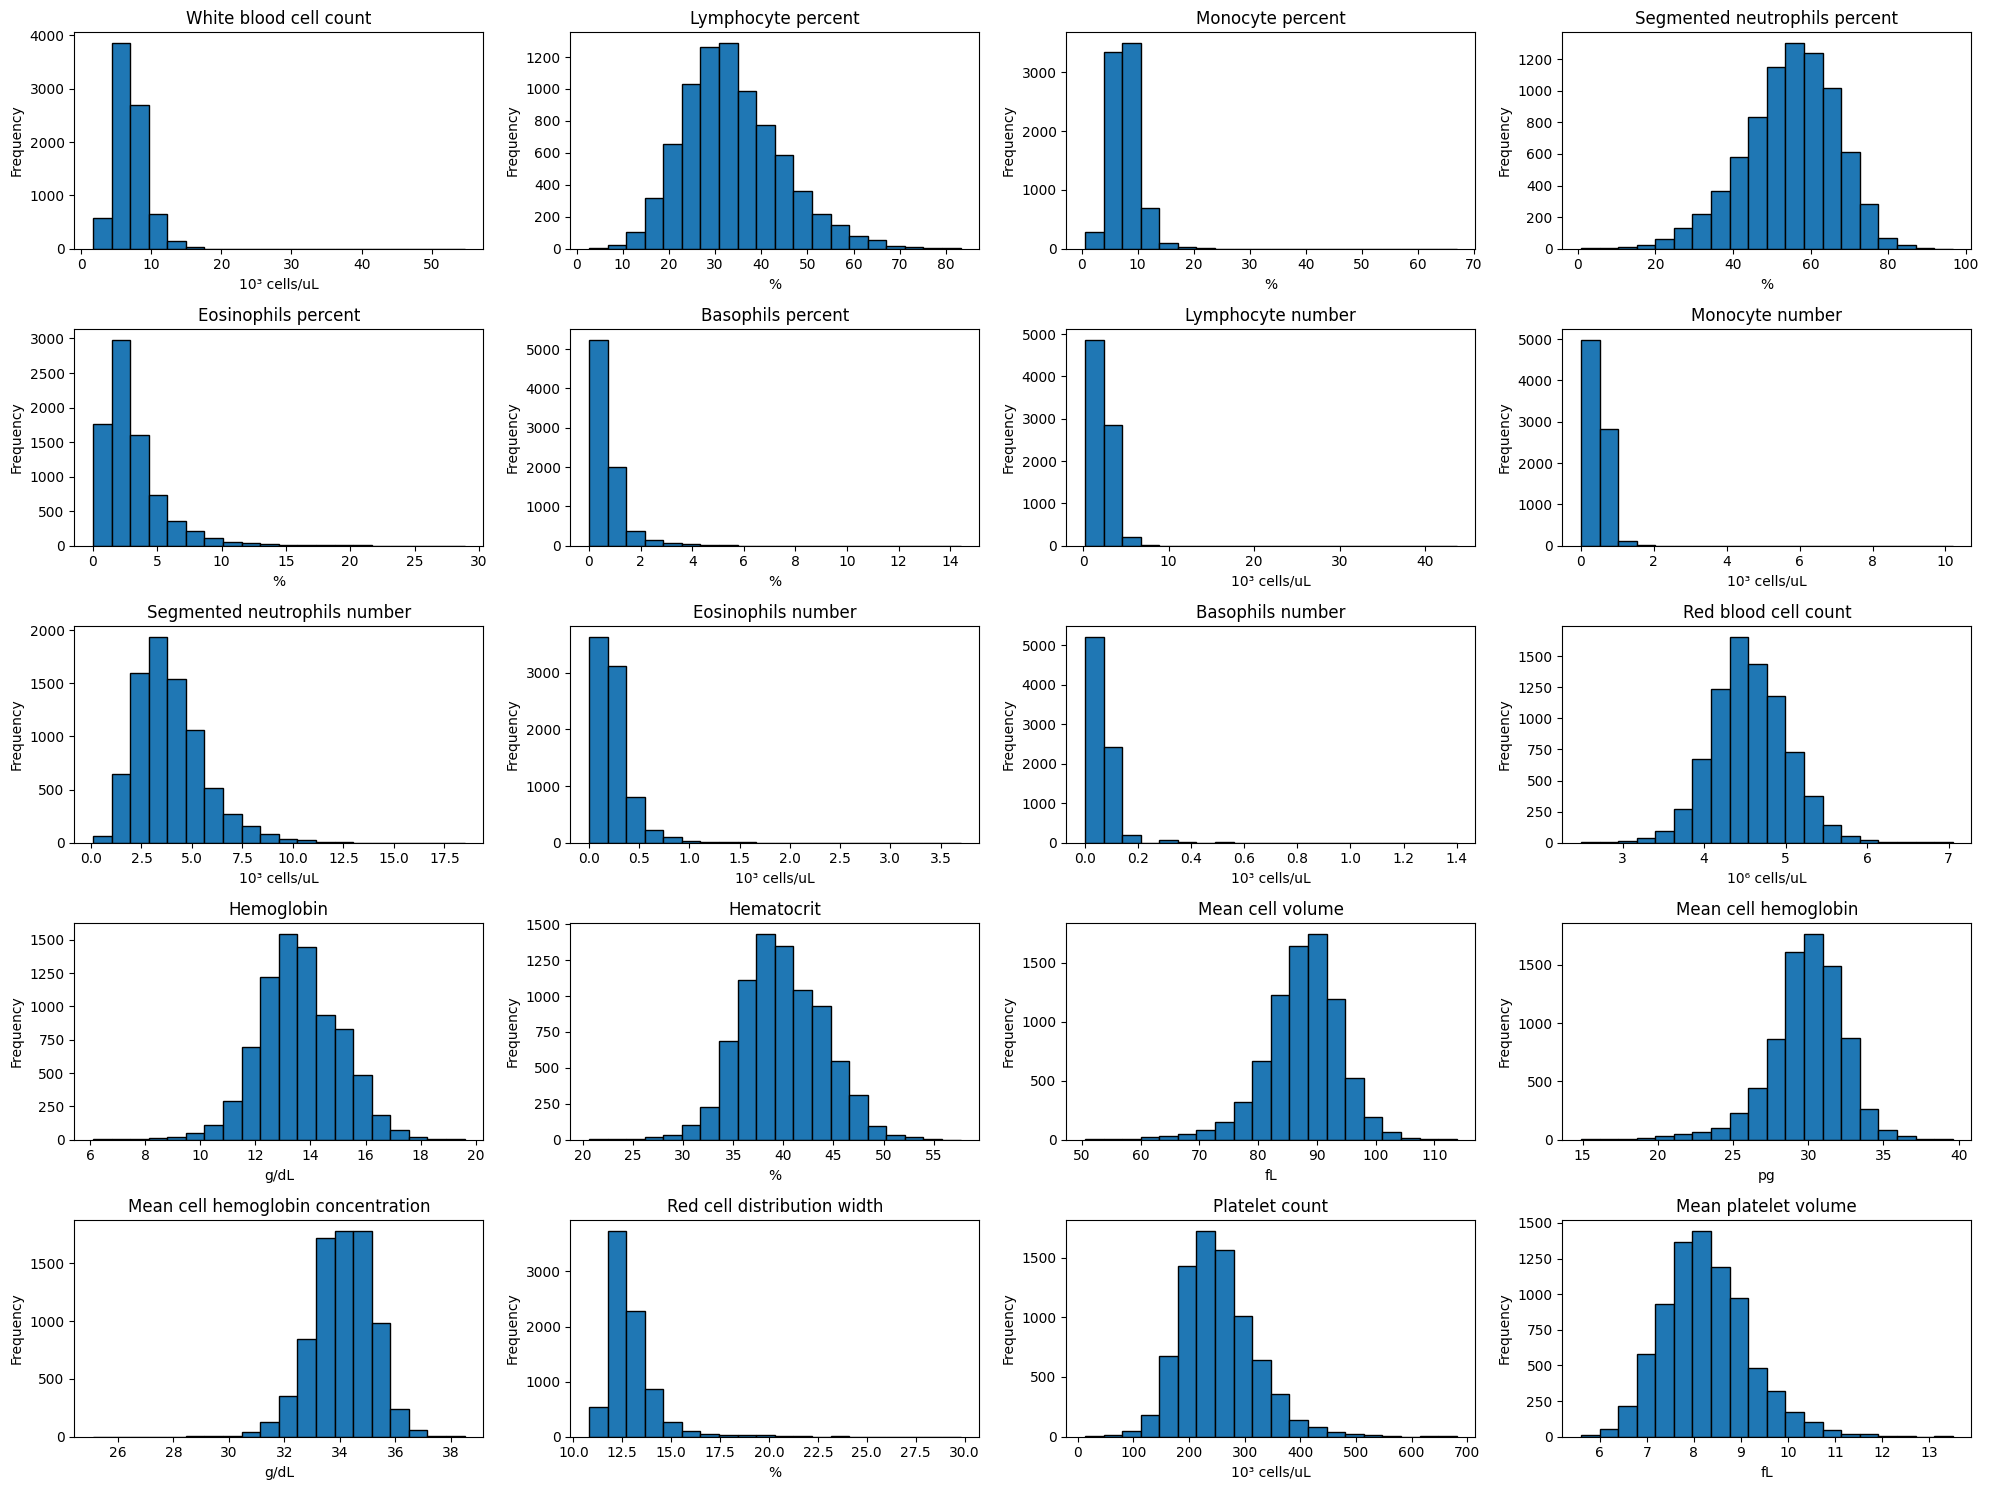

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

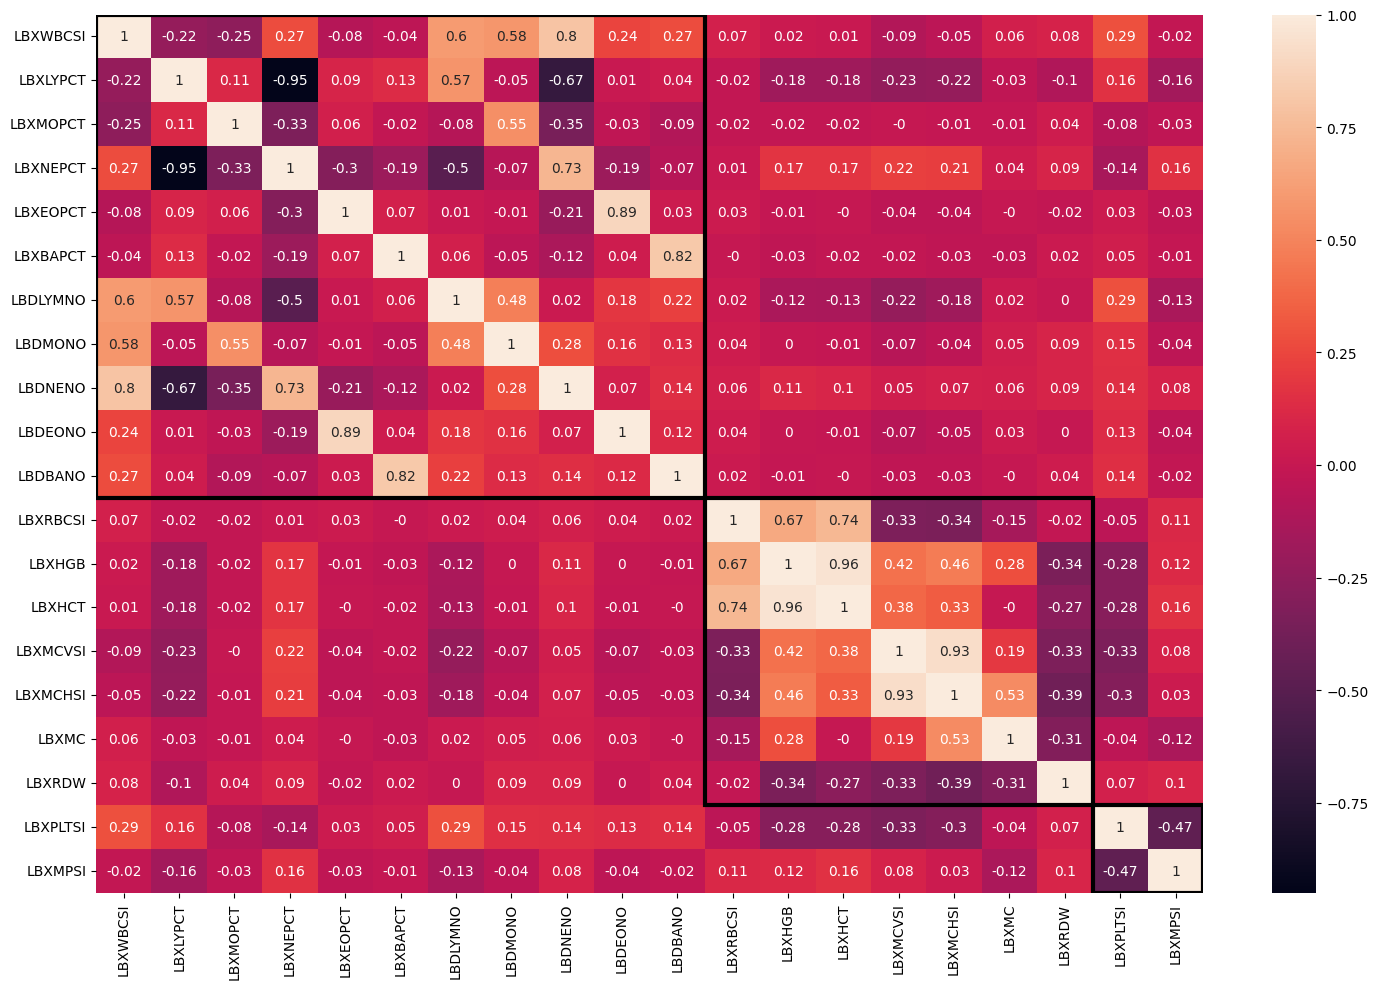

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2011-2012
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/BIOPRO_G.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [9]:
biopro = pd.read_sas('BIOPRO_G.xpt')
biopro.describe()

SEQN       LBXSAL     LBDSALSI     LBXSATSI     LBXSASSI  \
count   6549.000000  5976.000000  5976.000000  5972.000000  5969.000000   
mean   67066.713849     4.306861    43.068608    23.701105    25.325515   
std     2821.728354     0.343757     3.437569    24.637657    15.955600   
min    62161.000000     2.100000    21.000000     5.000000     7.000000   
25%    64610.000000     4.100000    41.000000    15.000000    19.000000   
50%    67091.000000     4.300000    43.000000    19.000000    23.000000   
75%    69512.000000     4.500000    45.000000    26.000000    27.000000   
max    71916.000000     5.500000    55.000000  1363.000000   597.000000   

          LBXSAPSI       LBXSBU     LBDSBUSI       LBXSCA     LBDSCASI  ...  \
count  5974.000000  5975.000000  5975.000000  5974.000000  5974.000000  ...   
mean     79.868597    12.514979     4.468231     9.418296     2.354574  ...   
std      52.831267     5.454846     1.947445     0.356370     0.089093  ...   
min       7.000000     2.000000     0.710000     6.500000     1.625000  ...   
25%      54.000000     9.000000     3.210000     9.200000     2.300000  ...   
50%      66.000000    12.000000     4.280000     9.400000     2.350000  ...   
75%      85.000000    15.000000     5.360000     9.600000     2.400000  ...   
max     729.000000    95.000000    33.920000    11.300000     2.825000  ...   

            LBXSUA     LBDSUASI     LBXSNASI      LBXSKSI     LBXSCLSI  \
count  5974.000000  5974.000000  5974.000000  5973.000000  5974.000000   
mean      5.361667   318.911851   138.980080     3.939260   103.935554   
std       1.418777    84.388923     2.211889     0.340605     2.825649   
min       0.400000    23.800000   102.000000     2.300000    70.000000   
25%       4.300000   255.800000   138.000000     3.700000   102.000000   
50%       5.200000   309.300000   139.000000     3.900000   104.000000   
75%       6.200000   368.800000   140.000000     4.100000   106.000000   
max      11.300000   672.100000   153.000000     7.300000   115.000000   

          LBXSOSSI       LBXSGB     LBDSGBSI       LBXSTR     LBDSTRSI  
count  5974.000000  5967.000000  5967.000000  5969.000000  5969.000000  
mean    277.533813     2.886559    28.865594   139.687385     1.577073  
std       4.917955     0.457225     4.572253   121.747718     1.374528  
min     207.000000     0.700000     7.000000    12.000000     0.135000  
25%     275.000000     2.600000    26.000000    70.000000     0.790000  
50%     277.000000     2.800000    28.000000   107.000000     1.208000  
75%     280.000000     3.100000    31.000000   168.000000     1.897000  
max     315.000000     5.900000    59.000000  3187.000000    35.981000  

[8 rows x 38 columns]

<Axes: >

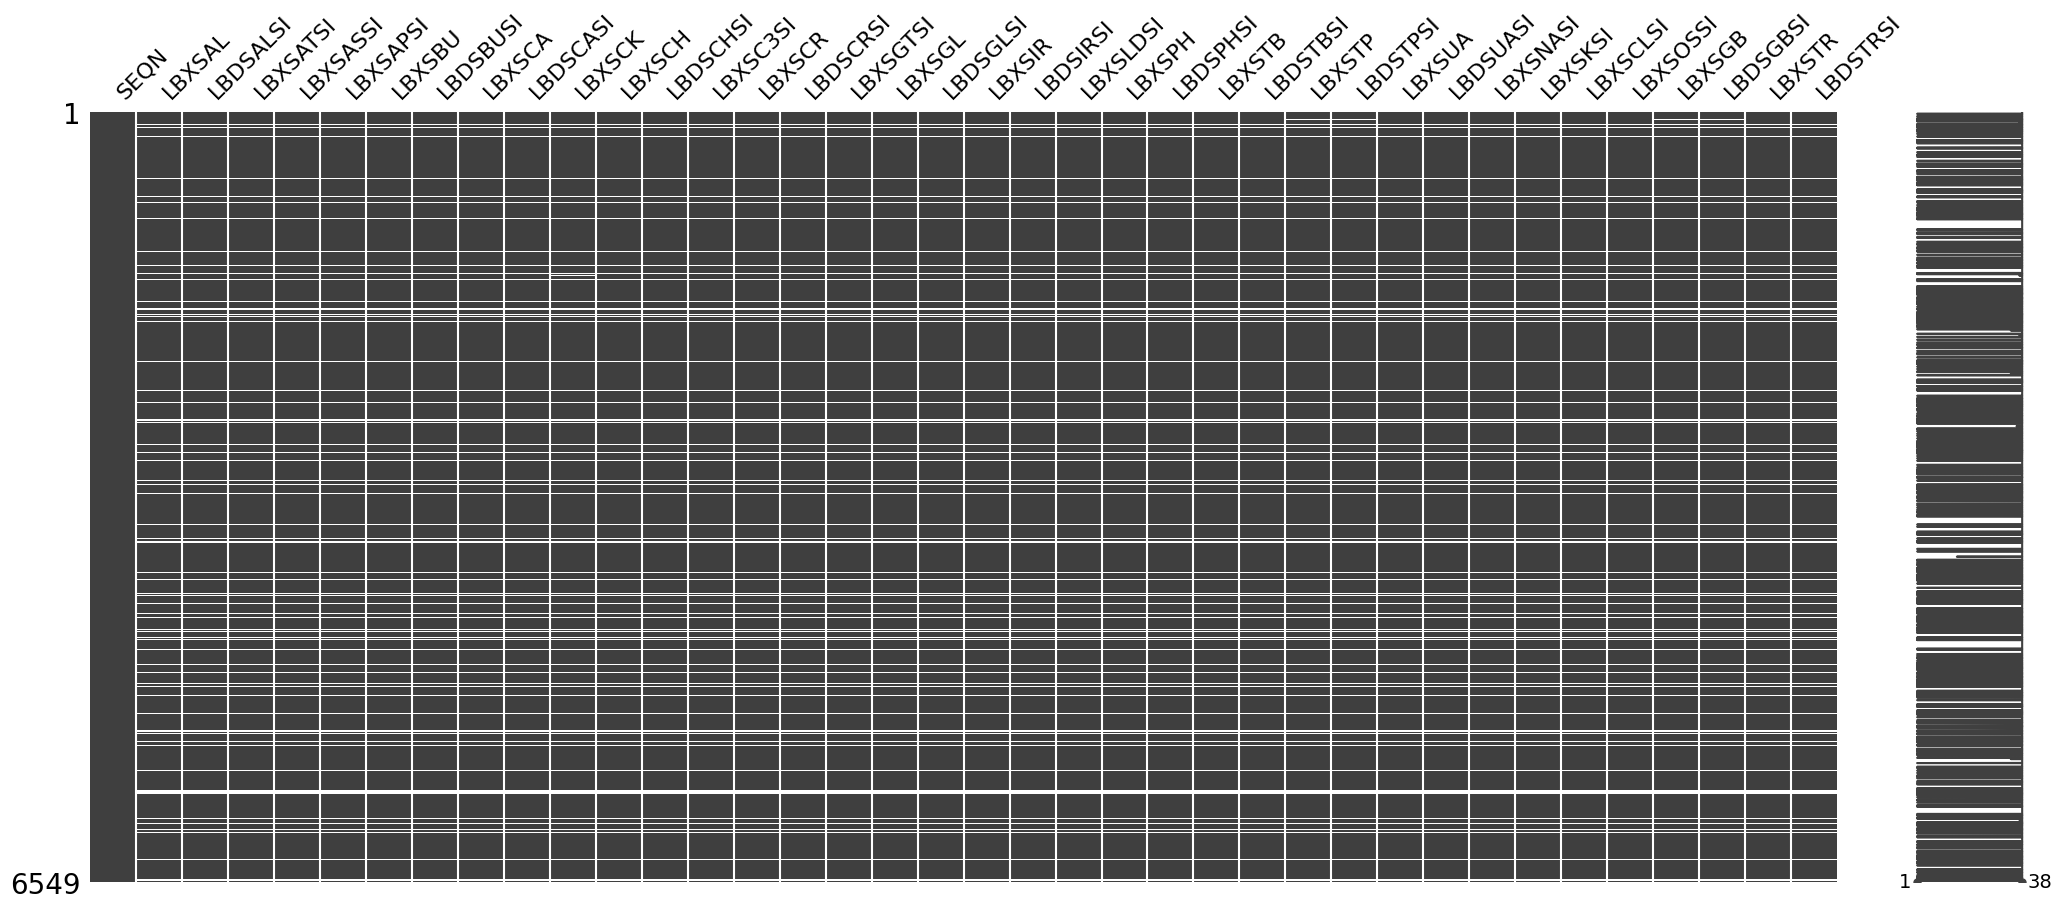

In [10]:
msno.matrix(biopro)

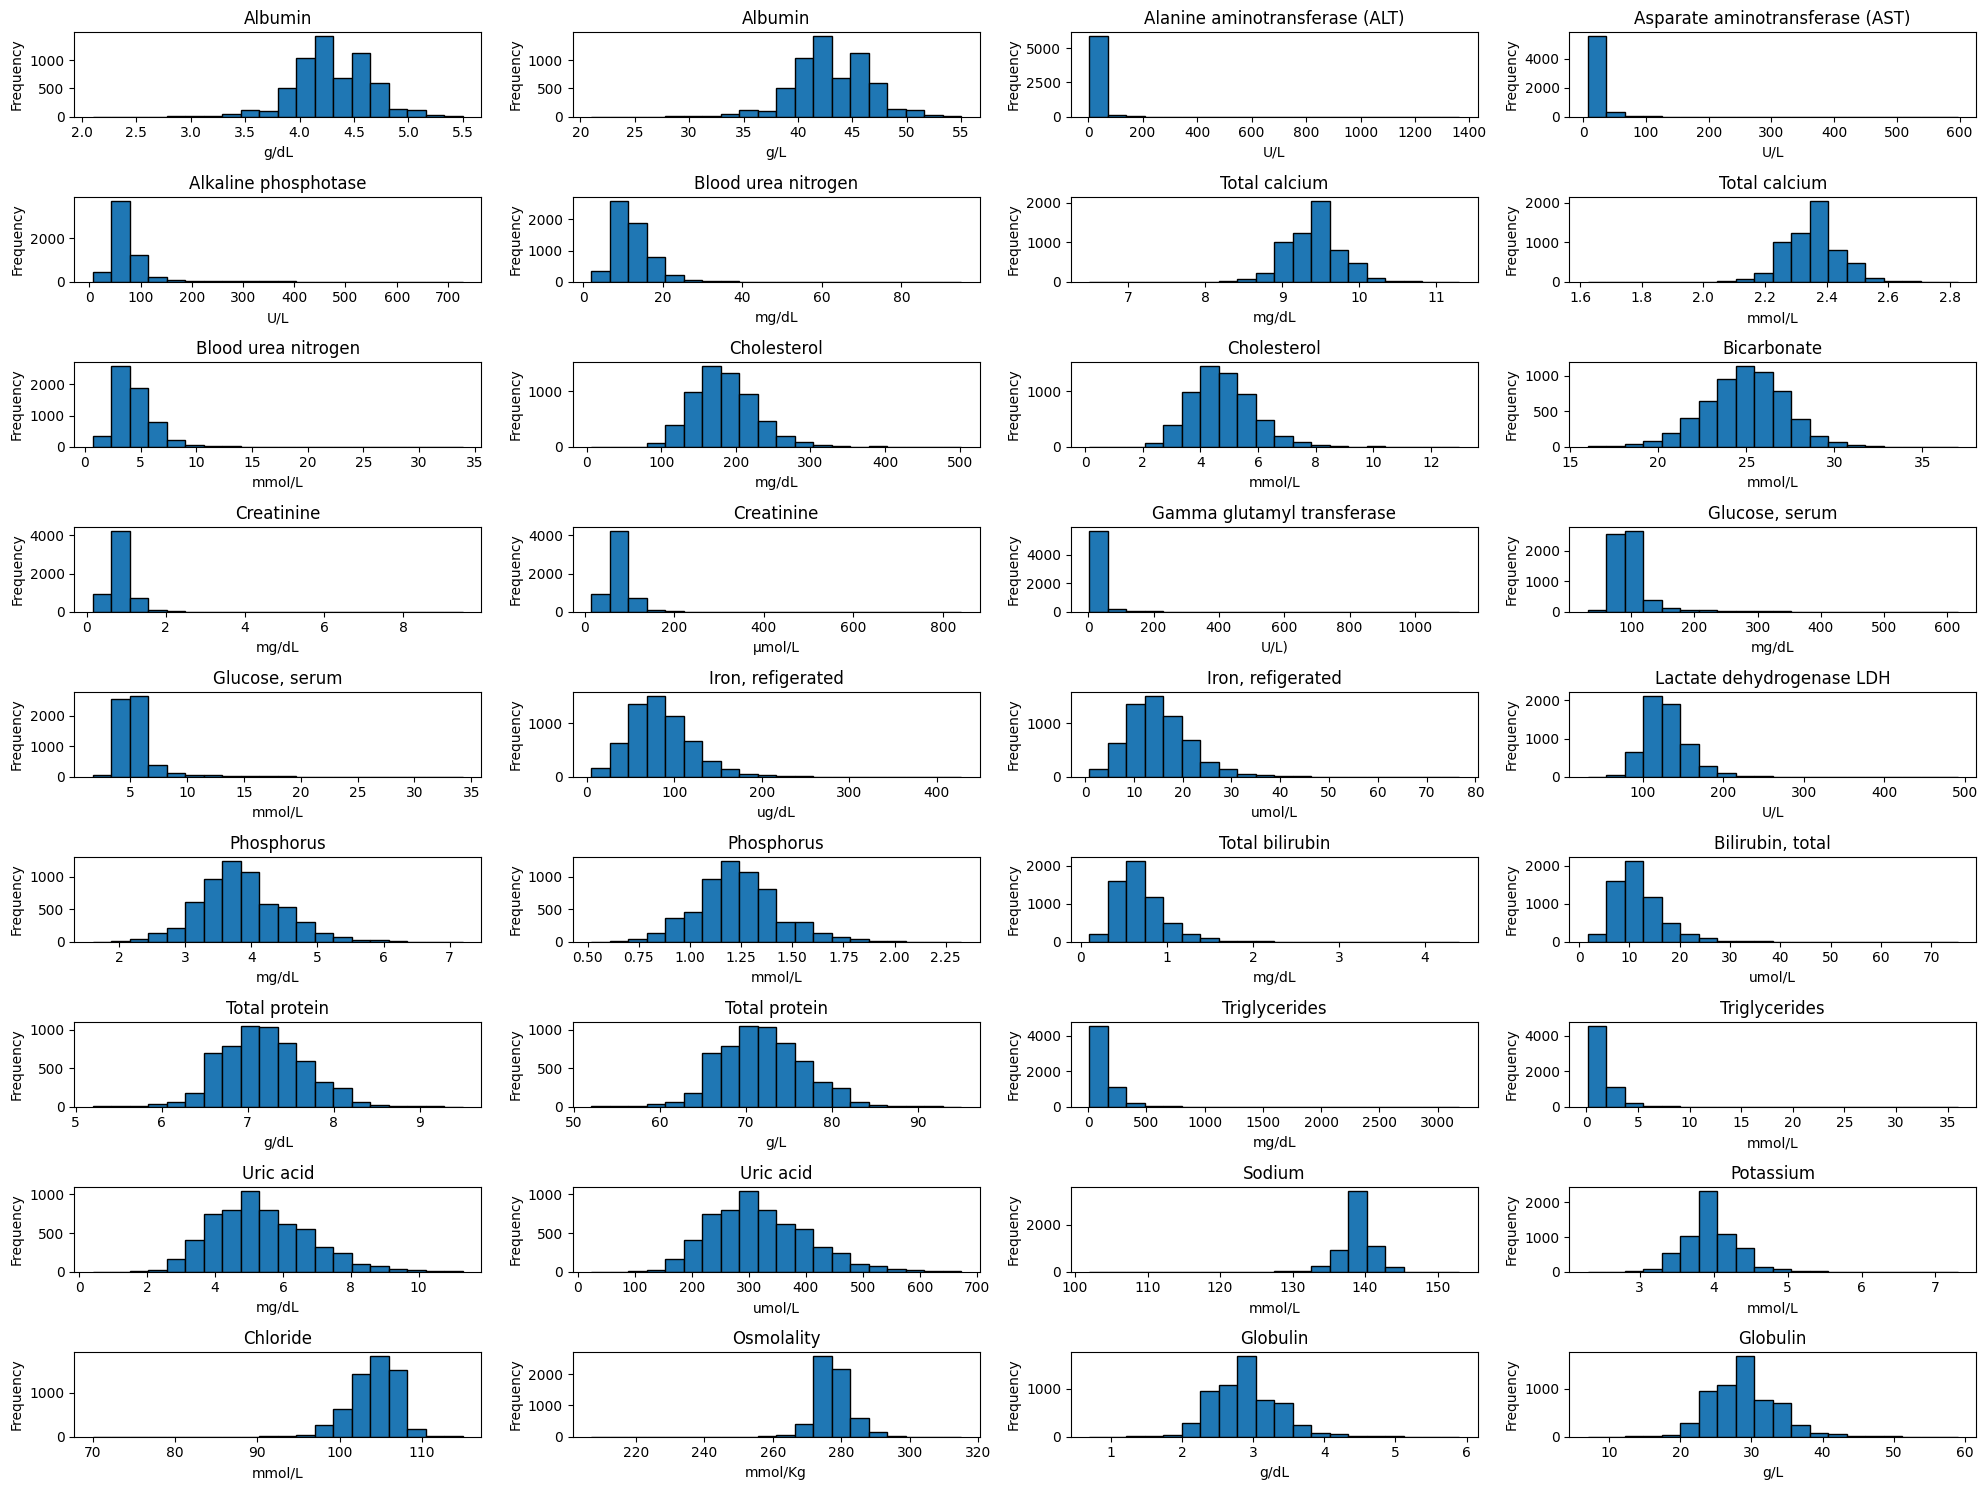

In [11]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()